In [1]:
import pandas as pd
import numpy as np
import missingno as msno

In [2]:
path_load = '/home/arfrech/Documents/Cursos/data science/Projects/cybersecurity - TCC/tcc-dsa/data/raw'
df = pd.read_csv(f'{path_load}/Obfuscated-MalMem2022.csv')
categoria_familia = df.Category.str.split('-',expand=True)[[0,1]].replace({1:{None:'Benign'}}).rename(columns={0:'Category',1:'Family'})
df = pd.concat([df.drop(columns='Category'),categoria_familia],axis=1)
df = df.astype({'Class':'category','Category':'category','Family':'category'})
df.head(3)

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class,Category,Family
0,45,17,10.555556,0,202.844444,1694,38.50000,9129,212.302326,0,...,24,116,0,121,87,0,8,Benign,Benign,Benign
1,47,19,11.531915,0,242.234043,2074,44.12766,11385,242.234043,0,...,24,118,0,122,87,0,8,Benign,Benign,Benign
2,40,14,14.725000,0,288.225000,1932,48.30000,11529,288.225000,0,...,27,118,0,120,88,0,8,Benign,Benign,Benign


In [3]:
df.shape

(58596, 58)

In [4]:
df.info(show_counts=True,verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 58 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   pslist.nproc                            58596 non-null  int64   
 1   pslist.nppid                            58596 non-null  int64   
 2   pslist.avg_threads                      58596 non-null  float64 
 3   pslist.nprocs64bit                      58596 non-null  int64   
 4   pslist.avg_handlers                     58596 non-null  float64 
 5   dlllist.ndlls                           58596 non-null  int64   
 6   dlllist.avg_dlls_per_proc               58596 non-null  float64 
 7   handles.nhandles                        58596 non-null  int64   
 8   handles.avg_handles_per_proc            58596 non-null  float64 
 9   handles.nport                           58596 non-null  int64   
 10  handles.nfile                           58596 

In [5]:
df['Class'].value_counts()

Class
Benign     29298
Malware    29298
Name: count, dtype: int64

In [7]:
df['Category'].value_counts()

Category
Benign        29298
Spyware       10020
Ransomware     9791
Trojan         9487
Name: count, dtype: int64

In [9]:
df['Family'].value_counts()[1:].sum()

29298

In [5]:
df = df.drop_duplicates()

In [6]:
df.shape

(58047, 58)

In [7]:
df.isnull().sum().sort_values()

pslist.nproc                              0
psxview.not_in_eprocess_pool              0
psxview.not_in_ethread_pool               0
psxview.not_in_pspcid_list                0
psxview.not_in_csrss_handles              0
psxview.not_in_session                    0
psxview.not_in_deskthrd                   0
psxview.not_in_pslist_false_avg           0
psxview.not_in_eprocess_pool_false_avg    0
psxview.not_in_ethread_pool_false_avg     0
psxview.not_in_pspcid_list_false_avg      0
psxview.not_in_csrss_handles_false_avg    0
psxview.not_in_session_false_avg          0
psxview.not_in_deskthrd_false_avg         0
modules.nmodules                          0
svcscan.nservices                         0
svcscan.kernel_drivers                    0
svcscan.fs_drivers                        0
svcscan.process_services                  0
svcscan.shared_process_services           0
svcscan.interactive_process_services      0
svcscan.nactive                           0
callbacks.ncallbacks            

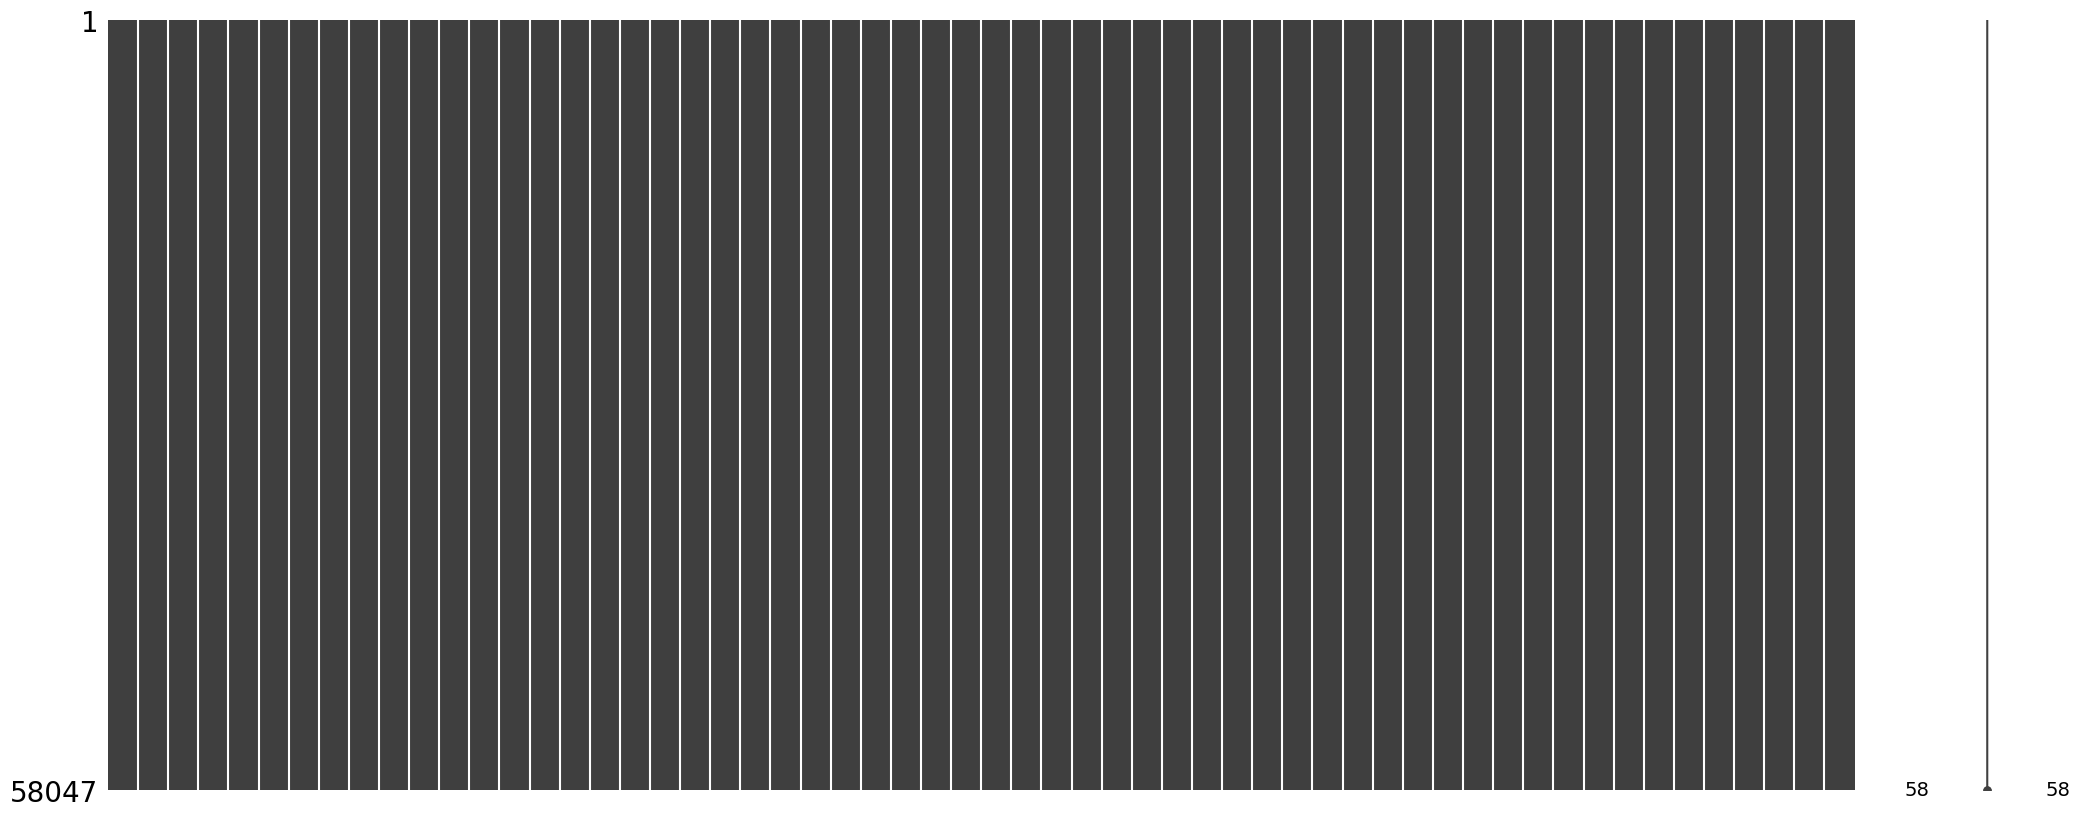

In [8]:
msno.matrix(df);

In [9]:
df.iloc[:,:-3].var().sort_values().head(3)

pslist.nprocs64bit                      0.0
svcscan.interactive_process_services    0.0
handles.nport                           0.0
dtype: float64

In [10]:
df[['pslist.nprocs64bit','svcscan.interactive_process_services','handles.nport']].describe()

,pslist.nprocs64bit,svcscan.interactive_process_services,handles.nport
count,58047.0,58047.0,58047.0
mean,0.0,0.0,0.0
std,0.0,0.0,0.0
min,0.0,0.0,0.0
25%,0.0,0.0,0.0
50%,0.0,0.0,0.0
75%,0.0,0.0,0.0
max,0.0,0.0,0.0


In [11]:
df = df.drop(columns=['pslist.nprocs64bit','svcscan.interactive_process_services','handles.nport'])

In [12]:
path_save = '/home/arfrech/Documents/Cursos/data science/Projects/cybersecurity - TCC/tcc-dsa/data/processed'
df.to_parquet(f'{path_save}/Obfuscated-MalMem2022-processed.parquet')

In [6]:
print(df.columns.tolist())

['pslist.nproc', 'pslist.nppid', 'pslist.avg_threads', 'pslist.nprocs64bit', 'pslist.avg_handlers', 'dlllist.ndlls', 'dlllist.avg_dlls_per_proc', 'handles.nhandles', 'handles.avg_handles_per_proc', 'handles.nport', 'handles.nfile', 'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread', 'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer', 'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load', 'ldrmodules.not_in_init', 'ldrmodules.not_in_mem', 'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg', 'ldrmodules.not_in_mem_avg', 'malfind.ninjections', 'malfind.commitCharge', 'malfind.protection', 'malfind.uniqueInjections', 'psxview.not_in_pslist', 'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool', 'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles', 'psxview.not_in_session', 'psxview.not_in_deskthrd', 'psxview.not_in_pslist_false_avg', 'psxview.not_in_eprocess_pool_false_avg', 'psxview.not_in_ethread_pool_false_avg', 'psxview.n